# Réseaux neuronal multicouche à Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [2]:
IMAGE_SIZE = 64

X = np.load("./data/X.npy")
X = X.reshape(len(X), 64*64) # mise a plat de l image

y_ = np.load("./data/Y.npy")

# Équivalence encodage/traduction
dic_equiv = {0:9, 1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2 , 9:5} 

y = np.zeros(len(y_))
for k in range(len(y)):
    a = y_[k]
    y[k] = int(dic_equiv[np.where(a==1)[0][0]])
y = y.astype(int)

In [3]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25)

param_grid = {
    'hidden_layer_sizes': [
        (400,),                 # Une seule couche large
        (200, 100),             # Deux couches dégressives
        (400, 200),             # Deux couches larges
        (200, 200, 200),        # Trois couches constantes
        (512, 256, 128, 64)     # Quatre couches (plus profond)
    ],
    'alpha': [0.5, 1.0, 2.0, 5.0, 10.0]
}

mlp = MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)

grid = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=12, refit=True, verbose=1)

grid.fit(X_train, y_train)

print(f"Meilleurs paramètres : {grid.best_params_}")
print(f"Score du meilleur: {grid.best_estimator_.score(X_test, y_test)}")

Fitting 12 folds for each of 25 candidates, totalling 300 fits
Meilleurs paramètres : {'alpha': 2.0, 'hidden_layer_sizes': (200, 200, 200)}
Score du meilleur: 0.8527131782945736


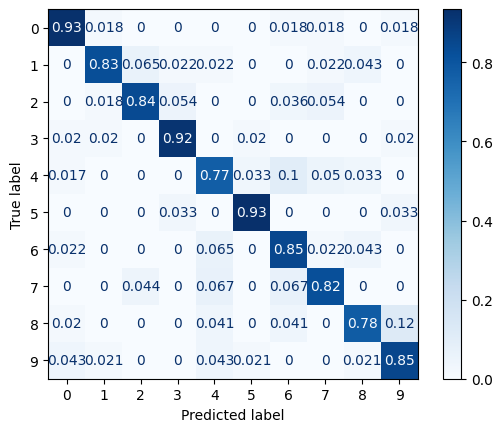

In [20]:
ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_test, cmap=plt.cm.Blues, display_labels=range(0, 10), normalize="true")
plt.show()